In [62]:
#import packages
import flopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import numpy as np
import os


#additional analysis tools
import flopy.utils.binaryfile as bf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


np.set_printoptions(threshold=np.inf)

#jupyter specific--included to show plots in notebook
%matplotlib inline 

In [63]:
ensembles = [
[1,3,3,3,1,1,3],#gro more
[3,1,3,3,1,1,3], #gro more
[3,1,1,1,3,3,1],#gro more
[1,1,1,1,3,3,1],# gro more
[2,1,2,1,3,3,1],#foe
[2,1,2,1,3,1,1],#foe
[2,1,2,2,1,1,1],#foe
[2,2,1,3,2,2,3],#aq
[2,2,1,1,2,2,1],#aq
[1,1,1,1,1,1,1] #aq
]

#ensemble_num = ensembles[0]#change ensemble here
#print(ensemble_num)
name = "ensemble_"

wellmove = 1
barley = 0

nrow = 50 #number of rows
ncol = 50 #number of columns
dx= 1000 #width of grid cells in x direction 
dy= 1000 #width of grid cells in y direction 

well_row = 29
well_col = 37
well_loc = (2,well_row, well_col)

well2_xy= [25000, 25000] #xy location of well 
well2_row = np.floor((nrow)-(well2_xy[1]/dy)) #convert the y location to a row
well2_col=np.floor(well2_xy[0]/dx)-1 #convert the x location to a column
well2_loc = (2,well2_row, well2_col)

well3_xy= [12500, 12500] #xy location of well 
well3_row = np.floor((nrow)-(well3_xy[1]/dy)) #convert the y location to a row
well3_col=np.floor(well3_xy[0]/dx) #convert the x location to a column
well3_loc = (2,well3_row, well3_col)

if (wellmove == 1): 
    well4_row = 19
else:  
    well4_row = 38 
#well4_row = 38 
well4_col = 12 
well4_loc = (2,well4_row, well4_col)

head = np.tile({},len(ensembles))
# leakage = np.tile({},len(ensembles))
# fff = np.tile({},len(ensembles))
# stor = np.tile({},len(ensembles))
# recharge = np.tile({},len(ensembles))
# et = np.tile({},len(ensembles))
# frf = np.tile({},len(ensembles))

# head_ts = []
# mw1_head_ts = []
# mw2_head_ts = []
# ag_head_ts = []
# #print(head)
# for i in range(len(ensembles)):
#     name = "ensemble_"   #Create the file name from list 
#     for k in range(len(ensembles[i])):
#         string = str(ensembles[i][k])
#         name = name + string   
#         #name = name + 'b' #need these for crop switch
#         #name = name + 'w'
# #     head[i] = {}
# #     leakage[i] = {}
# #     fff[i] = {}
# #     stor[i] = {}
# #     recharge[i] = {}
# #     et[i] = {}
# #     frf[i] = {}
#     headobj = flopy.utils.binaryfile.HeadFile(name+'.hds')
#     #budgobj = flopy.utils.binaryfile.CellBudgetFile(name+'.cbc')
#     #Monitoring well timeseries
#     head_ts.append(headobj.get_ts(well_loc))
#     mw1_head_ts.append(headobj.get_ts(well2_loc))
#     mw2_head_ts.append(headobj.get_ts(well3_loc))
#     ag_head_ts.append(headobj.get_ts(well4_loc))
#     #times = headobj.get_times()
#     #print(budgobj.get_unique_record_names())

    #for stress_per, time in enumerate(times): #iterate through times at end of each stress period
       # head[i]['sp%s'%(stress_per)] = headobj.get_data(totim=time) #append heads to head list for ea stress per
     #   leakage[i]['sp%s'%(stress_per)] = budgobj.get_data(text='RIVER LEAKAGE',totim=time) #append right face flow to frf list for ea stress per
       # fff[i]['sp%s'%(stress_per)] = budgobj.get_data(text='FLOW FRONT FACE',totim=time) #append front face flow to fff list for ea stress per
       # frf[i]['sp%s'%(stress_per)] = budgobj.get_data(text='flow right face', totim=time)
       # stor[i]['sp%s'%(stress_per)] = budgobj.get_data(text='STORAGE',totim=time)
        #recharge[i]['sp%s'%(stress_per)] = budgobj.get_data(text='RECHARGE', totim=time) 
        #et[i]['sp%s'%(stress_per)] = budgobj.get_data(text='ET', totim=time) 

In [64]:
#Get heads for barley and well runs

if (barley == 1): #only run this if barley = 1
    if (wellmove == 1): 
        well4_row = 19
    else:  
        well4_row = 38 
    #well4_row = 38 
    well4_col = 12 
    well4_loc = (2,well4_row, well4_col)
    
    
    head_ts_b = []
    mw1_head_ts_b = []
    mw2_head_ts_b = []
    ag_head_ts_b = []
  
    for i in range(len(ensembles)):
        name = "ensemble_"   #Create the file name from list 
        for k in range(len(ensembles[i])):
            string = str(ensembles[i][k])
            name = name + string   
        name = name + 'b' #need these for crop switch
          

        headobj = flopy.utils.binaryfile.HeadFile(name+'.hds')

        #Monitoring well timeseries
        head_ts_b.append(headobj.get_ts(well_loc))
#         mw1_head_ts_b.append(headobj.get_ts(well2_loc))
#         mw2_head_ts_b.append(headobj.get_ts(well3_loc))
#         ag_head_ts_b.append(headobj.get_ts(well4_loc))
        

if (wellmove == 1): 
    well4_row = 19
    #well4_row = 38 
    well4_col = 12 
    well4_loc = (2,well4_row, well4_col)    

    head_ts_w = []
    mw1_head_ts_w = []
    mw2_head_ts_w = []
    ag_head_ts_w = []
    for i in range(len(ensembles)):
        name = "ensemble_"   #Create the file name from list 
        for k in range(len(ensembles[i])):
            string = str(ensembles[i][k])
            name = name + string   
        name = name + 'w' #need these for crop switch         

        headobj = flopy.utils.binaryfile.HeadFile(name+'.hds')

        #Monitoring well timeseries
        head_ts_w.append(headobj.get_ts(well_loc))
        mw1_head_ts_w.append(headobj.get_ts(well2_loc))
        mw2_head_ts_w.append(headobj.get_ts(well3_loc))
        ag_head_ts_w.append(headobj.get_ts(well4_loc))        

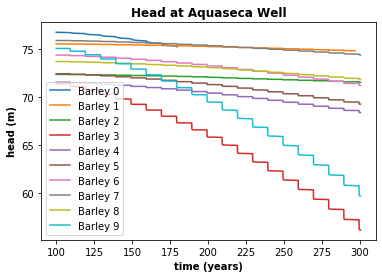

2156


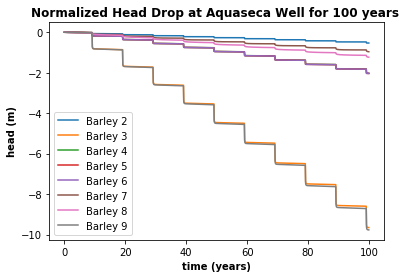

Final Drawdown values
Barley2: -0.5325012
Barley3: -9.651966
Barley4: -2.0276566
Barley5: -2.0350647
Barley6: -2.0354767
Barley7: -0.9621124
Barley8: -1.2331467
Barley9: -9.768784


In [75]:
# Aquaseca well
nrow = 50 #number of rows
ncol = 50 #number of columns
dx= 1000 #width of grid cells in x direction 
dy= 1000 #width of grid cells in y direction 



cell_id1 = well_loc #cell at the center of the ag area
#time_series1 = headobj.get_ts(cell_id1) #get the time series using flopy


#print(head_ts[0])
#print(head_ts_w[0])

#create firt plot  
plt.subplot(1, 1, 1)
plt.title("Head at Aquaseca Well",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(0,10):
#     label = 'Ensemble ' + str(j)
#     plt.plot(head_ts_[j][1200:, 0]/360, head_ts[j][1200:, 1], label=label) #plot the time series with points at each record
    label = 'Barley ' + str(j)
    plt.plot(head_ts_b[j][1200:, 0]/360, head_ts_b[j][1200:, 1], label=label)
#     label = 'Well ' + str(j)
#     plt.plot(head_ts_w[j][1200:, 0]/360, head_ts_w[j][1200:, 1], label=label)
plt.legend()
#plt.savefig("Head_Aqua5.png",dpi=600)
plt.show()
print(len(head_ts_b[0])) 

# #NORMALIZE IT
# normalized_head = np.tile({},len(ensembles))
# for k in range(len(ensembles)):
#     normalized_head[k] = []
#     for i in range(2401, 3601):
#         normalized_head[k].append(head_ts[k][i,1] - head_ts[k][2400,1])
     
        
#Normalize the Barley
# normalized_head_b = np.tile({},len(ensembles[2:9]))
normalized_head_b = np.tile({},10)
for k in range(2,10):
    normalized_head_b[k] = []
    for i in range(2401, 3601):
        normalized_head_b[k].append(head_ts_b[k][i,1] - head_ts_b[k][2400,1])
        
# #Normalize the well scenario
# normalized_head_w = np.tile({},len(ensembles))
# for k in range(len(ensembles)):
#     normalized_head_w[k] = []
#     for i in range(2401, 3601):
#         normalized_head_w[k].append(head_ts_w[k][i,1] - head_ts_w[k][2400,1])
        
plt.subplot(1, 1, 1)
plt.title("Normalized Head Drop at Aquaseca Well for 100 years ",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
# for j in range(len(ensembles[2:9])):
for j in range(2,10):
    label = 'Ensemble ' + str(j)
    ts = np.arange(0, 100, 1/12)
#     plt.plot(ts,normalized_head[j], label=label)
    label = 'Barley ' + str(j)
    plt.plot(ts,normalized_head_b[j], label=label)
#     label = 'Well ' + str(j)
#     plt.plot(ts,normalized_head_w[j], label=label)
plt.legend()
#plt.savefig("Head_Aqua5.png",dpi=600)
plt.show()

#print(len(normalized_head[1]))
print('Final Drawdown values')
for j in range(2,10):
#     label = 'Ensemble ' + str(j) +': '
#     print(label + str(normalized_head[j][1199]))
    label = 'Barley' + str(j) +': '
    print(label + str(normalized_head_b[j][1199]))
#     label = 'Well' + str(j) +': '
#     print(label + str(normalized_head_w[j][1199]))
    

IndexError: list index out of range

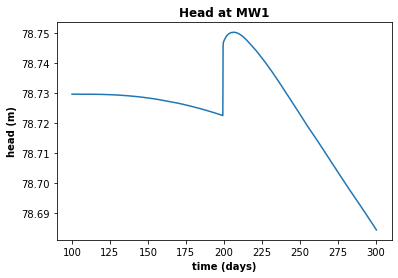

In [12]:
cell_id1 = well2_loc #cell at the center of the ag area
time_series1 = headobj.get_ts(cell_id1) #get the time series using flopy

#create firt plot  
plt.subplot(1, 1, 1)
plt.title("Head at MW1",fontweight='bold')
plt.xlabel('time (days)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(mw1_head_ts[j][1200:, 0]/360, mw1_head_ts[j][1200:, 1], label=label) #plot the time series with points at each record
plt.legend()
#plt.savefig("Head_M1_5.png",dpi=600)
plt.show()

#NORMALIZE IT
mw1_normalized_head = np.tile({},len(ensembles))
for k in range(len(ensembles)):
    mw1_normalized_head[k] = []
    for i in range(1200, 3601):
        mw1_normalized_head[k].append(mw1_head_ts[k][i,1] - mw1_head_ts[k][1200,1])
        
plt.subplot(1, 1, 1)
plt.title("Normalized Head Drop at MW1 - Btm layer",fontweight='bold')
plt.xlabel('time (months)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(range(1200,3601),mw1_normalized_head[j], label=label) #plot the time series with points at each record
plt.legend()
#plt.savefig("Head_Aqua5.png",dpi=600)
plt.show()

In [ ]:
#Head at Monitoring well 2 
plt.subplot(1, 1, 1)
plt.title("Head at MW2",fontweight='bold')
plt.xlabel('time (days)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(mw2_head_ts[j][1200:, 0]/360, mw2_head_ts[j][1200:, 1], label=label) #plot the time series with points at each record

plt.legend()
#plt.savefig("Head_M1_5.png",dpi=600)
plt.show()

#NORMALIZE IT
mw2_normalized_head = np.tile({},len(ensembles))
for k in range(len(ensembles)):
    mw2_normalized_head[k] = []
    for i in range(1200, 3601):
        mw2_normalized_head[k].append(mw2_head_ts[k][i,1] - mw2_head_ts[k][1200,1])
        
plt.subplot(1, 1, 1)
plt.title("Normalized Head Drop at MW2",fontweight='bold')
plt.xlabel('time (months)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(range(1200,3601),mw2_normalized_head[j], label=label) #plot the time series with points at each record
plt.legend()
#plt.savefig("Head_Aqua5.png",dpi=600)
plt.show()

In [ ]:
#Ag Well Plot
plt.subplot(1, 1, 1)
plt.title("Head at Ag Well",fontweight='bold')
plt.xlabel('time (days)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(ag_head_ts[j][1200:, 0]/360, ag_head_ts[j][1200:, 1], label=label) #plot the time series with points at each record

plt.legend()
#plt.savefig("Head_M1_5.png",dpi=600)
plt.show()

#NORMALIZE IT
ag_normalized_head = np.tile({},len(ensembles))
for k in range(len(ensembles)):
    ag_normalized_head[k] = []
    for i in range(1200, 3601):
        ag_normalized_head[k].append(ag_head_ts[k][i,1] - ag_head_ts[k][1200,1])
        
plt.subplot(1, 1, 1)
plt.title("Normalized Head Drop at Ag Well",fontweight='bold')
plt.xlabel('time (months)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(range(1200,3601),ag_normalized_head[j], label=label) #plot the time series with points at each record
plt.legend()
#plt.savefig("Head_Aqua5.png",dpi=600)
plt.show()

In [ ]:
##STream Leakage

#t2 = max(enumerate(times))
#print (times)
i = 9

head = np.tile({},len(ensembles))
leakage = np.tile({},len(ensembles))

name = "ensemble_"   #Create the file name from list 
for k in range(len(ensembles[i])):
    string = str(ensembles[i][k])
    name = name + string   
    
head[i] = {}
leakage[i] = {}

headobj = flopy.utils.binaryfile.HeadFile(name+'.hds')
budgobj = flopy.utils.binaryfile.CellBudgetFile(name+'.cbc')
times = headobj.get_times()
for stress_per, time in enumerate(times): #iterate through times at end of each stress period
    # head[i]['sp%s'%(stress_per)] = headobj.get_data(totim=time) #append heads to head list for ea stress per
    leakage[i]['sp%s'%(stress_per)] = budgobj.get_data(text='RIVER LEAKAGE',totim=time) #append right face flow to frf list for ea stre

        
        
# for p in range(len(ensembles)):
print("100 year Year Streamleakage for ensemble: ", i)
print(np.sum(leakage[i]['sp1201'][0].q))
print("200 year Year Streamleakage for ensemble: ", i)
print(np.sum(leakage[i]['sp2401'][0].q))
print("Final Year Streamleakage for ensemble: ", i)
print(np.sum(leakage[i]['sp3601'][0].q))

    
# t = t2[0] - 12
# print(t)
# leak = 0
# #for k in range(sim_years):
# for i in range(12):
#     leak = leak + np.sum(leakage4['sp%s'%(t+i)][0].q)
        
# print("Total stream leakge at year 100:")    
# print(leak)   


### ANNUAL SUms

# annual_leak = {}
                     
# yearlist = list(range(301))
# # for i in range(len(yearlist)):
# #     yearlist[i] = yearlist[i]*12
# #print(yearlist)
# for p in range(len(ensembles)):
#     annual_leak[p] = {}
#     for i in yearlist:
#         storage_change = 0
#         for sp in range(12):
#             timestep = i + sp
#             storage_i = np.sum(leakage[p]['sp%s'%(timestep)][0].q)
#             storage_change = storage_change + storage_i
#             #print(storage_change)
#             if sp == 11:
#                 annual_leak[p][i] = storage_change
#                # print('year', i/12, storage_change)
#print(annual_leak)
# t = 0
# ileak = 0
# for i in range(12):
#     ileak = ileak + np.sum(leakage['sp%s'%(t+i)][0].q)
    
# print(int(ileak))    

# ##GW outflow
# t = t2[0] - 12
# print(t)
# frf_total = 0
# for k in range(nlay):
#     for i in range(12):
#         frf_total = frf_total + np.sum(frf4['sp%s'%(t+i)][0][k][:][48])

# print("Total GW outflow 100 year:")
# print(frf_total)
# #print(np.sum(leakage['sp0'][0].q) - np.sum(leakage['sp1199'][0].q))
# nlay = 3
# annual_gwout = {}
# for p in range(len(ensembles)):
#     annual_gwout[p] = {}
#     for i in yearlist:
#         storage_change = 0
#         for sp in range(12):
#             timestep = i + sp
#             for k in range(nlay):        
#                 storage_i = np.sum(frf[p]['sp%s'%(timestep)][0][k][:][48])
#                 storage_change = storage_change + storage_i
#             #print(storage_change)
#             if sp == 11:
#                 annual_gwout[p][i] = storage_change
#                # print('year', i/12, storage_change)
# #print(annual_gwout[0])
# out = 0
# for p in range(len(ensembles)):
#     print("Final Year GW outflow for ensemble: ", p)
#     for k in range(nlay):
#          out = out + np.sum(frf[p]['sp3601'][0][k][:][48])
#     print(out)

## ET
# t = t2[0] - 12
# print(t)
# ET_total = 0
# for i in range(12):
#        ET_total = ET_total + np.sum(ET4['sp%s'%(t+i)][0][1][:][:])
# print("Total ET at year 100:")
# print(ET_total) 

# yearly_ET4 = []
# for i in yearlist:
#     storage_change = 0
#     for sp in range(12):
#         timestep = i + sp
#         storage_i = np.sum(ET4['sp%s'%(timestep)][0][1][:][:])
#         storage_change = storage_change + storage_i
#         #print(storage_change)
#         if sp == 11:
#             yearly_ET4.append(storage_change*-1)
#            # print('year', i/12, storage_change)
# #print(yearly_ET)
# ## Recharge
# t = t2[0] - 12
# print(t)
# rech_total = [0]

# for i in range(12):
#     rech_total = rech_total + np.sum(np.sum(rech4['sp%s'%(t+i)][0][1][:][:]))
# print("Total rech at year 100:")
# #print(rech_total)     

# annual_rech4 = []
# for i in range(100):
#     annual_rech4.append(rech_total)
    
# pumping4 = []  
# pump = 47
# decade = 10
# for i in range(100):
#     pumping4.append(round(pump * (decade**1.5))*360)
#     if (i > 0) & (i % 10 == 0):
#         decade = decade+1
# print(pumping4)
# storage4 = []

# for i in range(100):
#     sc = (pumping4[i] + yearly_ET4[i]+ yearly_gw4[i]) - (annual_rech4[i] + yearly_leak4[i])
#     storage4.append(sc)